# This is where we will do the initial DATA CLEANING for the dataset.

# I already opened the file in an excel spreadsheet to first explore the data to get a since of the layout and what I would need to clean.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
filepath = '/Users/andrewhlavacek/Documents/EDA_Netflix/netflix1.csv'

df = pd.read_csv(filepath)


# We need to check for the following before we can explore our data:
# 1. Missing Values
# 2. Duplicate Rows
# 3. Data Types
# 4. Column Names
# 5. Data Integrity


# Step 0: Display the first few rows of the Dataframe to show that it loaded correctly
print(df.head(1))

# Step 1: First we check for any missing values in the DataFrame --> (Nan/Null Values == 0)
print(df.isnull().sum())

# Step 2:Next we check for any duplicate rows in the DataFrame --> (Duplicate Rows == 0)
print(df.duplicated().sum())

# Step 3: Next we check for any data types in the DataFrame --> (All are objects)
print(df.dtypes)

# Step 4: Next we check for any column names in the DataFrame --> (All are correct)
print(df.columns)

# Step 5: Next we check for any data integrity in the DataFrame --> (All is good)
print(df.info())


# Now we are ready to explore the data / feature engineer


  show_id   type                 title         director        country  \
0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson  United States   

  date_added  release_year rating duration      listed_in  
0  9/25/2021          2020  PG-13   90 min  Documentaries  
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
0
show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object
Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Coun

# Now we want to do some EDA and plotting on the data.
#
# We will see the results of this later in Tableau to see that they match

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
filepath = '/Users/andrewhlavacek/Documents/EDA_Netflix/netflix1.csv'

df = pd.read_csv(filepath)

# We now want to figure out the following things about the data:
#
# Basic:
#
# What is the distribution of the data by country?
# What is the distribution of the data by genre?
# What is the distribution of the data by rating?
# What is the distribution of the data by release year?
#
# Intermediate:
#
# What is the top genre in the US?
# Are movies or TV shows more popular in India?
# What is the average release year of media from France?
#
#
# Hard:
#
# Does Netflix add content to their library based on season?
# What is the average duration of a movie and a TV show in Japan?

# ------------------------------------------------------------

# Now we want to see the distribution of the data by country
#print(df['country'].value_counts())

# Now we want to see the distribution of the data by genre
#print(df['type'].value_counts())

# Now we want to see the distribution of the data by rating
#print(df['rating'].value_counts())

# Now we want to see the distribution of the data by release year
#print(df['release_year'].value_counts())

# ------------------------------------------------------------

# Now we want to see the top genre in the US
us_rating_counts = df[df['country'] == 'United States']['rating'].value_counts()
#print(us_rating_counts) # --> 1000 MA, 538 R, 445 TV-14...

# Now we want to see the distribution of the data by TV shows vs Movies in India
india_tv_show_counts = df[(df['country'] == 'India') & (df['type'] == 'TV Show')]['type'].value_counts()
india_movie_counts = df[(df['country'] == 'India') & (df['type'] == 'Movie')]['type'].value_counts()

#print(india_tv_show_counts) # --> 81 TV Shows
#print(india_movie_counts) # --> 967 Movies


# Now we want to see the average release year of media from France
france_release_year = df[df['country'] == 'France']['release_year'].mean()
#print(france_release_year) # --> 2015.75 so basically 2016

# ------------------------------------------------------------

# Now we want to see if Netflix adds content to their library based on season
# We need to create a new column that is the season of the show
# Winter should be months 12, 1, 2
# Spring should be months 3, 4, 5
# Summer should be months 6, 7, 8
# Fall should be months 9, 10, 11


# Create a copy of date_added to work with, preserving original as string
date_temp = pd.to_datetime(df['date_added'], errors='coerce')  # errors='coerce' handles NaT for nulls

# Extract month from the datetime-converted copy
month_added = date_temp.dt.month

# Create season dictionary
season_dict = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

# Function to map month to season
def get_season(month):
    if pd.isna(month):
        return None
    for season, months in season_dict.items():
        if month in months:
            return season
    return None

# Apply function to get season column
df['season_added'] = month_added.apply(get_season)

# Save the updated DataFrame with only the new season column added
df.to_csv('/Users/andrewhlavacek/Documents/EDA_Netflix/netflix1.csv', index=False)

# Now we can see the seasons that the shows were added to Netflix
#print(df['season_added'].value_counts()) #--> 2309 Summer, 2234 Fall, 2136 Spring, 2111 Winter

# Finally we want to see the average duration of a movie and a TV show in Japan

# First convert duration to numeric by extracting just the number
def extract_duration_number(duration):
    if pd.isna(duration):
        return None
    # Extract numeric value from strings like "90 min" or "2 Seasons"
    return int(duration.split()[0])

# Apply conversion to duration column
df['duration_number'] = df['duration'].apply(extract_duration_number)

# Now calculate averages using the numeric duration
japan_movie_duration = df[(df['country'] == 'Japan') & 
                         (df['type'] == 'Movie')]['duration_number'].mean()
japan_tv_show_duration = df[(df['country'] == 'Japan') & 
                           (df['type'] == 'TV Show')]['duration_number'].mean()

#print(f"Average movie duration in Japan: {japan_movie_duration:.1f} minutes") # --> 97.6 minutes
#print(f"Average TV show duration in Japan: {japan_tv_show_duration:.1f} seasons") # --> 1.7 seasons
# ------------------------------------------------------------


/var/folders/xz/p2ff3pyj7ld80r8bfv3x3lk40000gn/T/ipykernel_41227/590124876.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, ax=axes[0,0], palette='viridis')
/var/folders/xz/p2ff3pyj7ld80r8bfv3x3lk40000gn/T/ipykernel_41227/590124876.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', ax=axes[0,1], palette='Set2')
/var/folders/xz/p2ff3pyj7ld80r8bfv3x3lk40000gn/T/ipykernel_41227/590124876.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rati

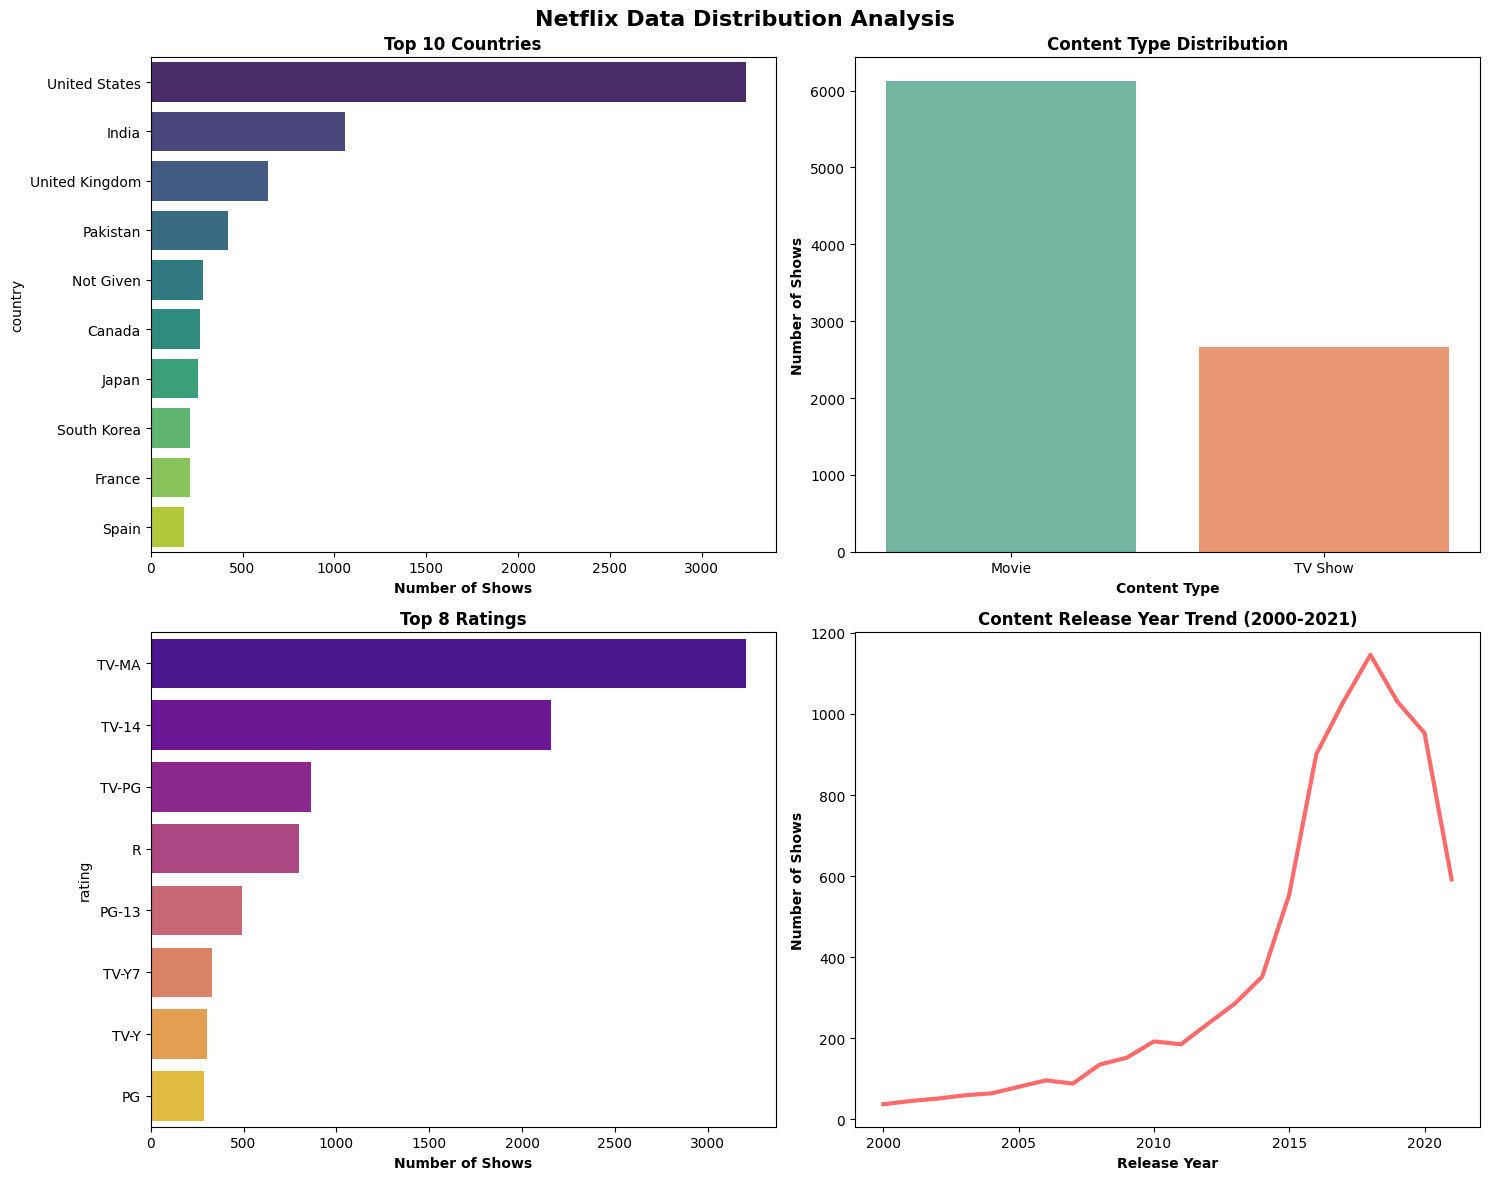

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepath = '/Users/andrewhlavacek/Documents/EDA_Netflix/netflix1.csv'
df = pd.read_csv(filepath)

# Now we are going to plot all of the findings that we had from the last notebook

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for multiple graphs
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Netflix Data Distribution Analysis', fontsize=16, fontweight='bold')

# Distribution of Data by Country (top 10)
country_counts = df['country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, ax=axes[0,0], palette='viridis')
axes[0,0].set_xlabel('Number of Shows', fontweight='bold')
axes[0,0].set_title('Top 10 Countries', fontweight='bold', fontsize=12)

# Distribution of Data by Type
sns.countplot(data=df, x='type', ax=axes[0,1], palette='Set2')
axes[0,1].set_xlabel('Content Type', fontweight='bold')
axes[0,1].set_ylabel('Number of Shows', fontweight='bold')
axes[0,1].set_title('Content Type Distribution', fontweight='bold', fontsize=12)

# Distribution of Data by Rating (top 8)
rating_counts = df['rating'].value_counts().head(8)
sns.barplot(x=rating_counts.values, y=rating_counts.index, ax=axes[1,0], palette='plasma')
axes[1,0].set_xlabel('Number of Shows', fontweight='bold')
axes[1,0].set_title('Top 8 Ratings', fontweight='bold', fontsize=12)

# Distribution of Data by Release Year (last 20 years)
recent_years = df[df['release_year'] >= 2000]['release_year'].value_counts().sort_index()
sns.lineplot(x=recent_years.index, y=recent_years.values, ax=axes[1,1], color='#FF6B6B', linewidth=3)
axes[1,1].set_xlabel('Release Year', fontweight='bold')
axes[1,1].set_ylabel('Number of Shows', fontweight='bold')
axes[1,1].set_title('Content Release Year Trend (2000-2021)', fontweight='bold', fontsize=12)

# Add some styling
plt.tight_layout()
plt.show()


/var/folders/xz/p2ff3pyj7ld80r8bfv3x3lk40000gn/T/ipykernel_41227/3240835165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['country'] == 'United States'],
/var/folders/xz/p2ff3pyj7ld80r8bfv3x3lk40000gn/T/ipykernel_41227/3240835165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['country'] == 'India'],


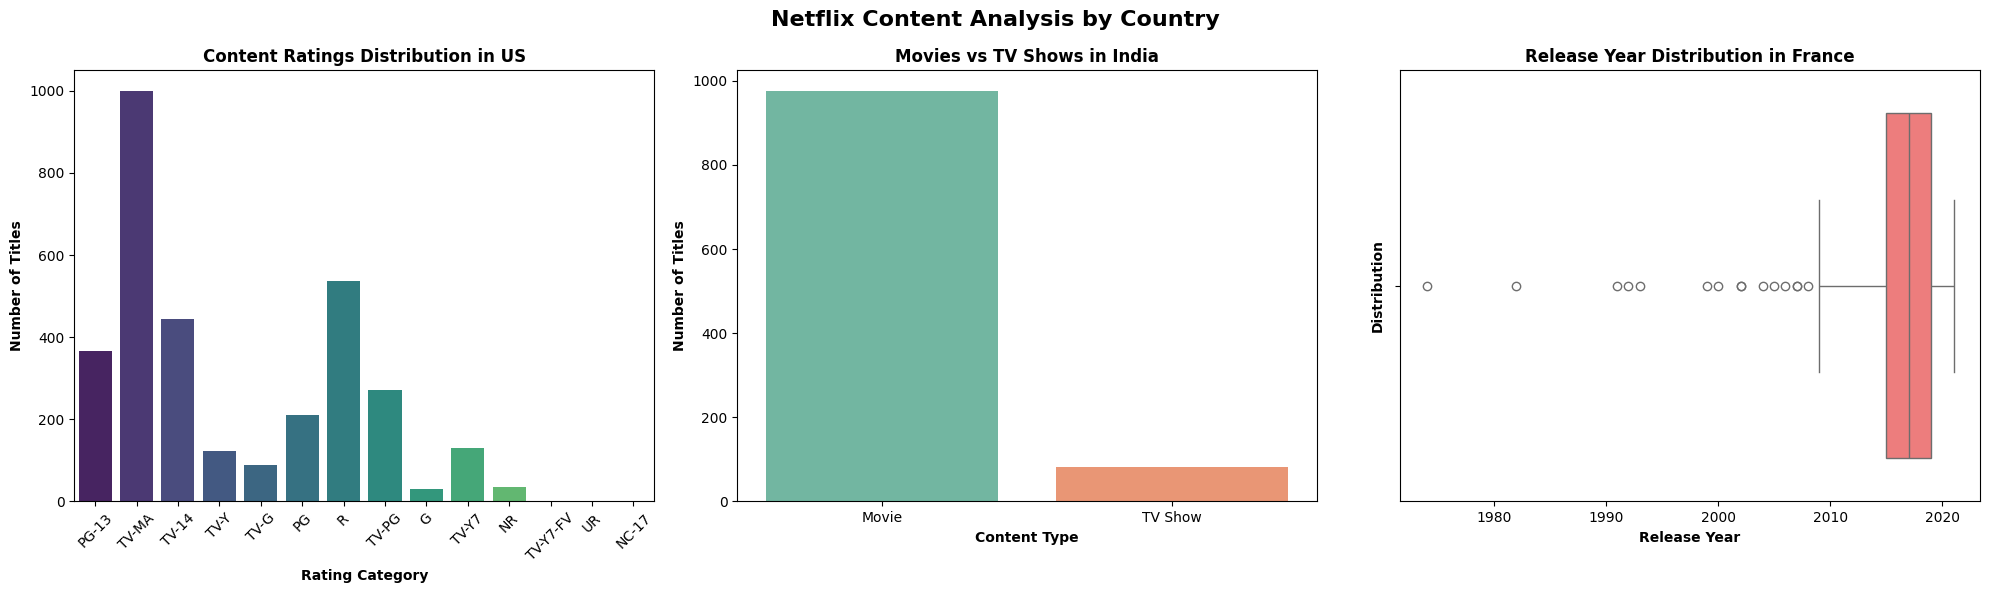

In [11]:
# Now we are going to plot all of the intermediate findings that we had from the last noteb

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for multiple graphs
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Netflix Content Analysis by Country', fontsize=16, fontweight='bold')

# Content Ratings in the United States
sns.countplot(data=df[df['country'] == 'United States'], 
              x='rating', 
              ax=axes[0],
              palette='viridis')
axes[0].set_title('Content Ratings Distribution in US', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Rating Category', fontweight='bold')
axes[0].set_ylabel('Number of Titles', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Content Type Distribution in India
sns.countplot(data=df[df['country'] == 'India'], 
              x='type', 
              ax=axes[1],
              palette='Set2')
axes[1].set_title('Movies vs TV Shows in India', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Content Type', fontweight='bold')
axes[1].set_ylabel('Number of Titles', fontweight='bold')

# Release Year Distribution in France
sns.boxplot(data=df[df['country'] == 'France'], 
            x='release_year',
            ax=axes[2],
            color='#FF6B6B')
axes[2].set_title('Release Year Distribution in France', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Release Year', fontweight='bold')
axes[2].set_ylabel('Distribution', fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()



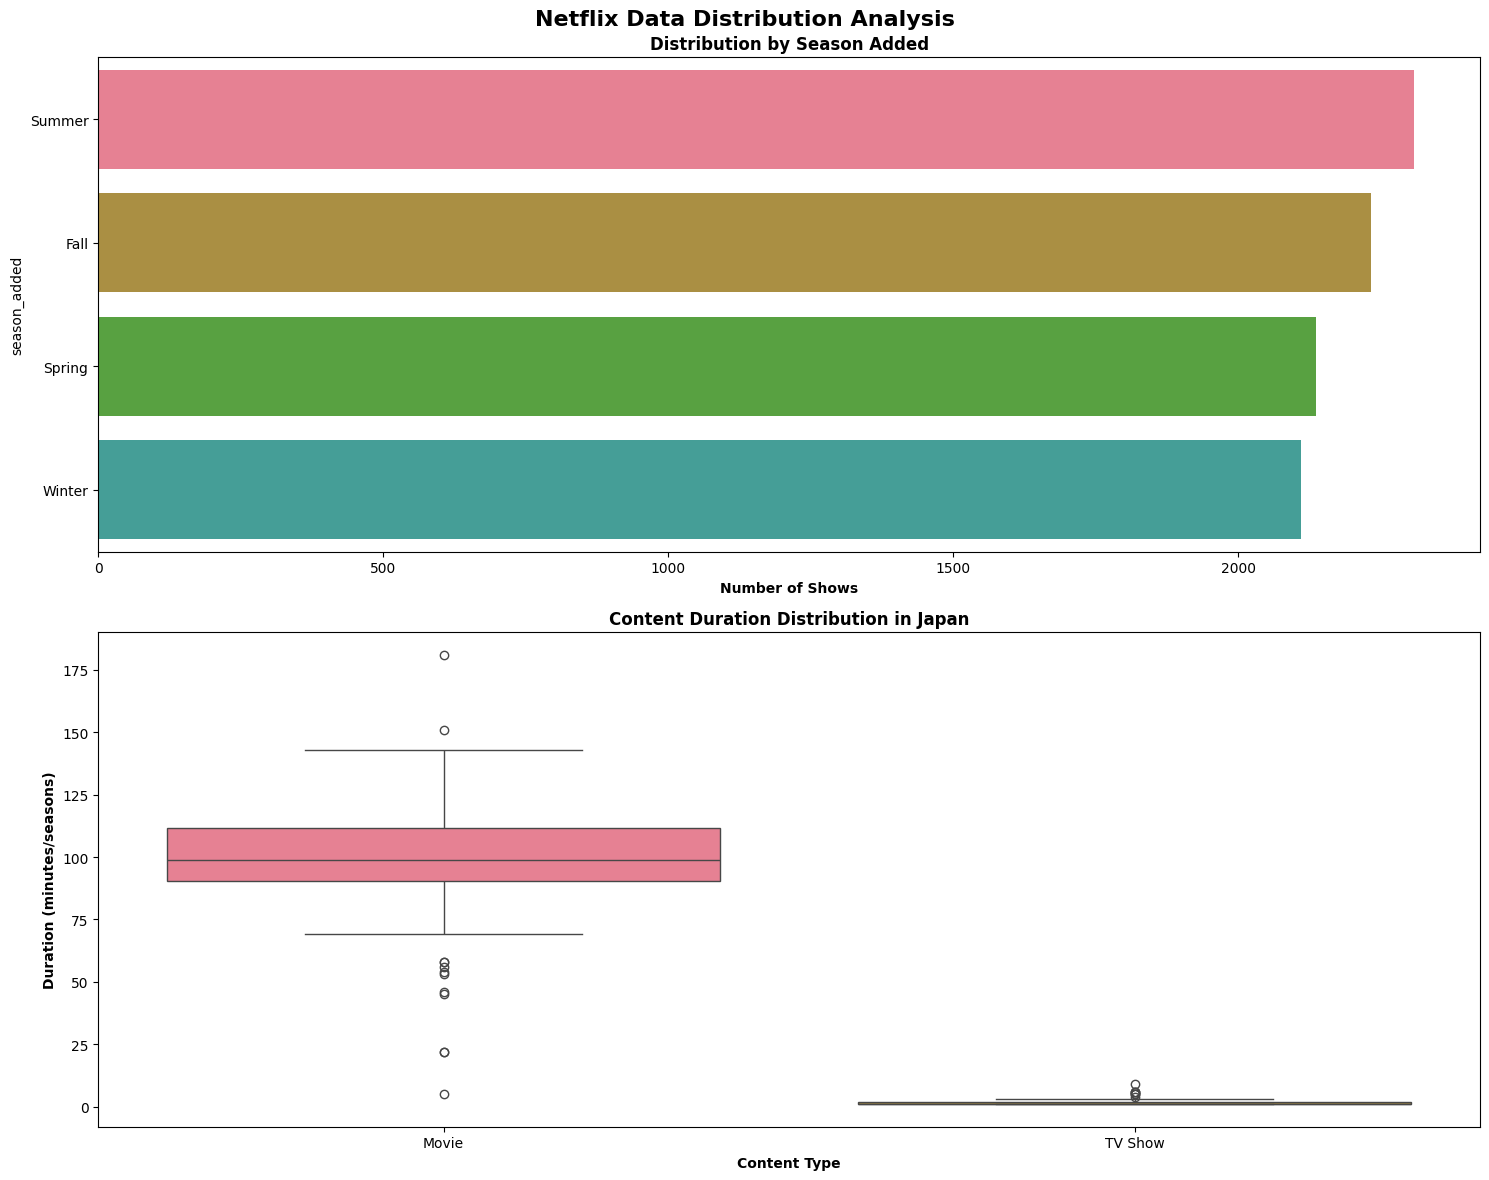

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Now we are going to plot all of the hard findings that we had from the last notebook

# First we want to plot the seasons that the shows were added to Netflix

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for multiple graphs
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Netflix Data Distribution Analysis', fontsize=16, fontweight='bold')

# Distribution of shows by season added
season_counts = df['season_added'].value_counts()
sns.barplot(x=season_counts.values, y=season_counts.index, ax=axes[0],
            hue=season_counts.index, legend=False)
axes[0].set_xlabel('Number of Shows', fontweight='bold')
axes[0].set_title('Distribution by Season Added', fontweight='bold', fontsize=12)

# ------------------------------------------------------------

# Average Duration by Content Type in Japan
japan_data = df[df['country'] == 'Japan']
movie_durations = japan_data[japan_data['type'] == 'Movie']['duration'].str.extract(r'(\d+)').astype(float)
tv_durations = japan_data[japan_data['type'] == 'TV Show']['duration'].str.extract(r'(\d+)').astype(float)

duration_data = pd.DataFrame({
    'Type': ['Movie']*len(movie_durations) + ['TV Show']*len(tv_durations),
    'Duration': pd.concat([movie_durations, tv_durations]).values.flatten()
})

sns.boxplot(data=duration_data, 
            x='Type', 
            y='Duration',
            ax=axes[1],
            hue='Type',
            legend=False)
axes[1].set_title('Content Duration Distribution in Japan', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Content Type', fontweight='bold')
axes[1].set_ylabel('Duration (minutes/seasons)', fontweight='bold')

plt.tight_layout()
plt.show()
